<div><center><img src="https://ml.ucv.ai/logo.png\" width=150"/> </center></div>

# 01 Regresión lineal: Formulación


### Versión v.5

El notebook lo puedo modificar, esta versión es la v.2 a 14/11/2025 a la 11 am de Caracas.

v1-3
- Derivando el problema de mínimos cuadrados
- Entendiendo porqué usamos sea ^2 como valor absoluto

v4
- Agregada prueba de  tarea para $\alpha$
- Agregado el método del gradiente

v5
- **Nuevo**: Gráfico de Loss function y curvas de nivel

 **Nota:** Solo trabajamos caso de regresión lineal simple (una sola característica) pero mencionamos la posibilidad de agregar mas

Autor: Fernando Crema García
- Contacto: fernando.cremagarcia@kuleuven.be; fernando.cremagarcia@esat.kuleuven.be

## 1. Aprendizaje automático

Nuestro objetivo en todo el curso es entender, adaptar y resolver el siguiente concepto:

"Se dice que un programa **aprende** de la experiencia E respecto a una clase de tareas T y una medida de rendimiento R, si su rendimiento en las tareas de T, medidas respecto a R, mejoran con la experiencia E."

> Tom Mitchell. Machine Learning. Página 3-4 (1997), McGraw-Hill, New York


## 2. Regresión Lineal

Si recordamos nuestro objetivo:

El caso simple es asumir que buscamos predecir un valor en base a conocimiento del pasado.

Encontrar una función, denotada como $f$, que mapee los datos de entrada $X$ a las etiquetas de salida $Y$.

$$
    Y = f(x) \text{ para } x \in X
$$

o de igual forma

$$
    f: X \rightarrow Y
$$
    
Donde:

1. $X$ representa los datos de entrada.
1. $Y$ son las etiquetas de salida o las respuestas deseadas.
1. $f(\cdot)$ es la función que el modelo de aprendizaje supervisado busca "aprender".

En el caso de regresión lineal debemos definir a $f$ como una relación lineal entre X y Y

Es decir, para un nuevo $x$, deberíamos predecir el valor de $y$ como $$ a \cdot x + b $$

> Nuestro trabajo es, entonces, saber cuál es el **mejor** par (a , b) para los datos de entrada.

| x  | y     |
|:----:|:-------:|
| 1  | .7    |
| 2  | 3.1   |
| 3  | 2.6   |
| 4  | 3.1   |
| 5  | 5.1   |
| 6  | 7.3   |
| 7  | 8.3   |
| 8  | 9.2   |
| 9  | 5.4   |
| 10 | 10.9 |

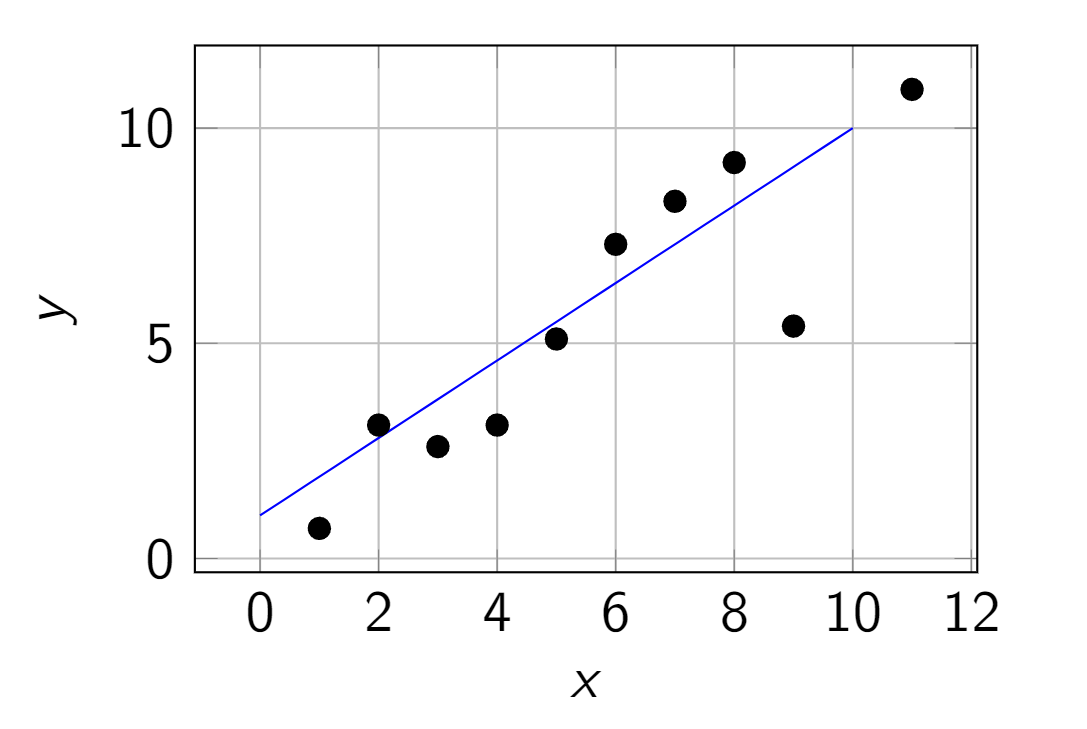

## Regresión lineal: definición

Finalmente podemos definir nuestro problema asumiendo que la relación entre los  datos y la salida es lineal

La regresión lineal es un modelo estadístico que busca modelar la relación lineal entre una variable dependiente $Y$ y una o más variables independientes $X$. En forma matricial, esto se representa como:

$$
Y = X\beta + \varepsilon
$$

donde:

1. $Y$ es el vector de variables dependientes.
1. $X$ es la matriz de variables independientes.
1. $\beta$ es el vector de coeficientes.
1. $\varepsilon$ es el vector de errores.



### **TODO:** Agregar dimensión de $\beta$

## 2.1 Definiciones sobre aprendizaje supervisado


1. Denominaremos a $X$ como conjunto de datos de entrenamiento o datos de entrada $$\displaystyle \{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \ldots, (x^{(m)}, y^{(m)})\}$$
1. $y^{(i)}$ son las etiquetas de salida para cada $x^{(i)}$.
1. Dada $f$, la **predicción** de $x^{(i)}, \; f(x^{(i)})$ la representaremos como $\bar{y}^{(i)}$.
1. $Error_i(x^{(i)}) = y^{(i)} - \bar{y}^{(i)} =  y^{(i)} -  f(x^{(i)}) $

-----
## 2.2 Objetivo principal
El objetivo, entonces, es encontrar una función $f$ que minimice los errores entre las predicciones y las etiquetas reales.

-----



## 2.3 Función de coste $J_\theta( y^{(i)}, \bar{y}^{(i)})$ (loss function)

Para poder minimizar los errores debemos conseguir una manera de medirlos

Generalmente definida como $J(\theta)$ o  $J_\theta( y^{(i)}, \bar{y}^{(i)})$ evalúa qué tan cerca están las predicciones del modelo $\bar{y}^{(i)}$ de las etiquetas reales $y^{(i)}$ en función de los parámetros del modelo $\theta$.

Algunas funciones de coste comunes incluyen:


1. **Clasificación**: Entropía Cruzada, Error Cuadrático Medio.
1. **regresión**: Error Cuadrático Medio, Error Absoluto Medio.



El objetivo del Aprendizaje Supervisado es encontrar los parámetros ($\theta$) que minimizan la función de coste.

------


## Problema de optimización

El objetivo es encontrar los parámetros $\theta$ que minimicen una función de costo $J(\theta)$:

\begin{equation}
\theta^* = \arg\min_{\theta} J(\theta)
\end{equation}

Donde:
1. $J(\theta)$ es la función de costo que mide la discrepancia entre las predicciones del modelo y las etiquetas reales.
1. $\theta$ son los parámetros del modelo a aprender.
1. $\theta^*$ representa los parámetros óptimos que minimizan $J(\theta)$.


La tarea es encontrar los parámetros que generen un modelo capaz de hacer predicciones precisas.

-------


### Ejemplo de formulación usando el error cuadrático medio (MSE)


El Error Cuadrático Medio (MSE) es una función de coste comúnmente utilizada en problemas de regresión y, en algunos casos, en problemas de clasificación. Se define como:

\begin{equation}
MSE = \frac{1}{m} \sum_{i=1}^{m} (y^{(i)} - \bar{y}^{(i)})^2
\end{equation}

Donde:
1. $m$ es el número de ejemplos en el conjunto de entrenamiento.
1. $y^{(i)}$ es la etiqueta real del ejemplo $i$.
1. $\bar{y}^{(i)}$ es la predicción del modelo para el ejemplo $i$.
1. IMPORTANTE: Fíjense como NO sabemos quién es $f$ solo sabemos que $$\bar{y}^{(i)} = f(x^{(i)})$$

El objetivo es minimizar el MSE ajustando los parámetros del modelo.

-------


## Mínimos cuadrados ordinarios (OLS) (Notación vectorial)

\begin{equation}
arg \min_{\beta} \sum_{i=1}^{?} (y_i - \boldsymbol{x}_i^T\boldsymbol{\beta})^2
\end{equation}

donde:
\begin{align*}
\boldsymbol{x}^{(i)} &\in \mathbb{R}^{?,?}  \text{ es el vector de variables predictoras para la observación } i, \\
\boldsymbol{\beta} &\in \mathbb{R}^{?,?}  \text{ es el vector de coeficientes,} \\
\boldsymbol{y}^{(i)} &\in \mathbb{R}^{?,?}  \text{ es el vector de predicciones } i, \\
y_i &\in \mathbb{R}^{?,?}  \text{ es el valor observado para la observación } i, \\
m & \text{ es el número de predictores } \\
n & \text{ es el número de observaciones.} \\
\end{align*}


Encontrar las dimensiones de $x_i$, $\beta$ y $y_i$





--------


## Mínimos cuadrados ordinarios (OLS) (Notación matricial)

Cuando la función de pérdida asociada a regresión es la norma 2, en algunos textos el problema se denomina MCO.

\begin{equation}
arg \min_{\beta} \|y-X\beta\|^2
\end{equation}

donde:

\begin{align*}
\boldsymbol{X}&\in \mathbb{R}^{?,?} \text{Matriz de datos}\\
\boldsymbol{\beta} &\in \mathbb{R}^{?,?} \text{ es el vector de coeficientes,} \\
y &\in \mathbb{R}^{?,?} \text{ es el vector de observaciones} i, \\
m & \text{ es el número de predictores } \\
n & \text{ es el número de observaciones.} \\
\end{align*}


Encontrar las dimensiones de $X$, $\beta$ y $y$

---------

## Representación gráfica

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

def plot_loss_surface_contour(X, y, w_range=(-5, 5), b_range=(-5, 5), resolution=100,
                              true_w=None, true_b=None, elev=30, azim=45):
    """
    Grafica la superficie y el contorno de la función de pérdida (MSE) para un modelo de regresión lineal de una variable.

    Parameters:
    -----------
    X : array-like, shape (n_samples,)
        Características de entrenamiento (1D)
    y : array-like, shape (n_samples,)
        Objetivo
    w_range : tuple, default=(-5, 5)
        Rango de los valores de nuestro modelos (asumimos de -5 a 5 para que sea sencillo graficar)
    b_range : tuple, default=(-5, 5)
        Rango del valor de sesgo
    resolution : int, default=100
        Número de puntos para cada dimensión del grid
    true_w : float, optional
        Valor del modelo optimal
    true_b : float, optional
        valor del sesgo optimal
    elev : float, default=30
        Ángulo de elevación de la cámara (grados)
    azim : float, default=45
        Ángulo de azimut de la cámara (grados)

    Returns:
    --------
    fig : matplotlib figure
        La figura
    """
    X = np.array(X).flatten()
    y = np.array(y).flatten()
    n_samples = len(X)

    # Creamos el grid dependiendo de la resolución
    w_vals = np.linspace(w_range[0], w_range[1], resolution)
    b_vals = np.linspace(b_range[0], b_range[1], resolution)
    W, B = np.meshgrid(w_vals, b_vals)

    # Calculamos el valor de pérdida PARA TODOS los valores dentro de nuestro grid
    L = np.zeros_like(W)
    for i in range(resolution):
        for j in range(resolution):
            w, b = W[i, j], B[i, j]
            predictions = w * X + b
            L[i, j] = np.mean((y - predictions) ** 2)

    # Creamos la figura
    fig = plt.figure(figsize=(14, 6))

    # Superficie 3D
    ax1 = fig.add_subplot(121, projection='3d')
    surf = ax1.plot_surface(W, B, L, cmap=cm.viridis, alpha=0.8,
                           linewidth=0, antialiased=True)
    ax1.set_xlabel('Peso (w)', fontsize=11)
    ax1.set_ylabel('Sesgo (b)', fontsize=11)
    ax1.set_zlabel('Pérdida (OLS)', fontsize=11)
    ax1.set_title('Superficie de Pérdida 3D', fontsize=13, fontweight='bold')

    # Cambiar el punto de vista de la cámara
    ax1.view_init(elev=elev, azim=azim)

    fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=5)

    # Agregar punto optimal si lo colocamos como parámetro
    if true_w is not None and true_b is not None:
        true_loss = np.mean((y - (true_w * X + true_b)) ** 2)
        ax1.scatter([true_w], [true_b], [true_loss], color='red', s=100,
                   marker='*', label='Punto Óptimo', zorder=5)
        ax1.legend()

    # Curvas de nivel
    ax2 = fig.add_subplot(122)
    contour = ax2.contour(W, B, L, levels=20, cmap=cm.viridis)
    ax2.clabel(contour, inline=True, fontsize=8)
    contourf = ax2.contourf(W, B, L, levels=50, cmap=cm.viridis, alpha=0.6)
    ax2.set_xlabel('Peso (w)', fontsize=11)
    ax2.set_ylabel('Sesgo (b)', fontsize=11)
    ax2.set_title('Curvas de Nivel de la Pérdida', fontsize=13, fontweight='bold')
    fig.colorbar(contourf, ax=ax2)

    # Agregar optimal
    if true_w is not None and true_b is not None:
        ax2.scatter([true_w], [true_b], color='red', s=100, marker='*',
                   label='Punto Óptimo', zorder=5, edgecolors='white', linewidths=2)
        ax2.legend()

    plt.tight_layout()
    return fig

### Pipeline sencillo de Aprendizaje automático

In [ ]:
np.random.seed(42)

In [ ]:
n_samples = 50
X_train = np.random.uniform(-3, 3, n_samples)
true_weight = 5.0
true_bias = 1.0
noise = np.random.normal(0, 0.5, n_samples)
y_train = true_weight * X_train + true_bias + noise

In [ ]:
# Calcular parámetros óptimos usando solución de forma cerrada
X_mean = X_train.mean()
y_mean = y_train.mean()
w_optimal = np.sum((X_train - X_mean) * (y_train - y_mean)) / np.sum((X_train - X_mean) ** 2)
b_optimal = y_mean - w_optimal * X_mean

print(f"Parámetros verdaderos: w={true_weight}, b={true_bias}")
print(f"Parámetros óptimos: w={w_optimal:.3f}, b={b_optimal:.3f}")



Parámetros verdaderos: w=5.0, b=1.0
Parámetros óptimos: w=4.981, b=0.992


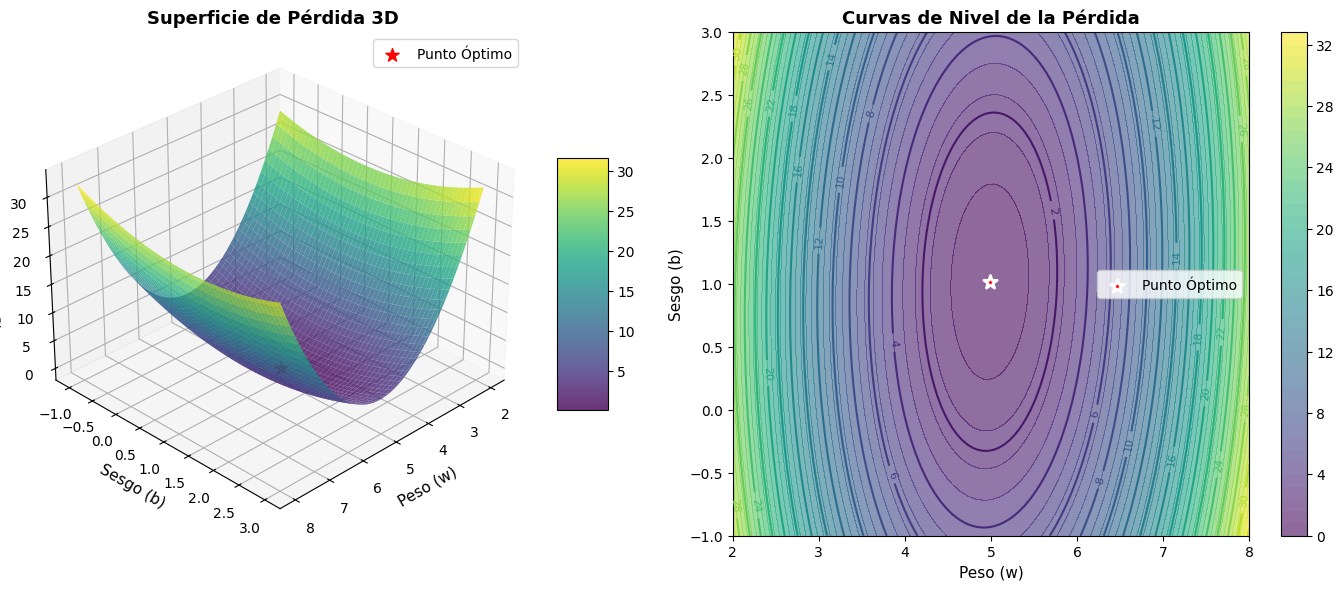

In [ ]:
# Graficar la función de pérdida
fig = plot_loss_surface_contour(
    X_train, y_train,
    w_range=(true_weight-3, true_weight+3),
    b_range=(true_bias-2, true_bias+2),
    resolution=100,
    true_w=w_optimal,
    true_b=b_optimal,
    elev=30, azim=45
)

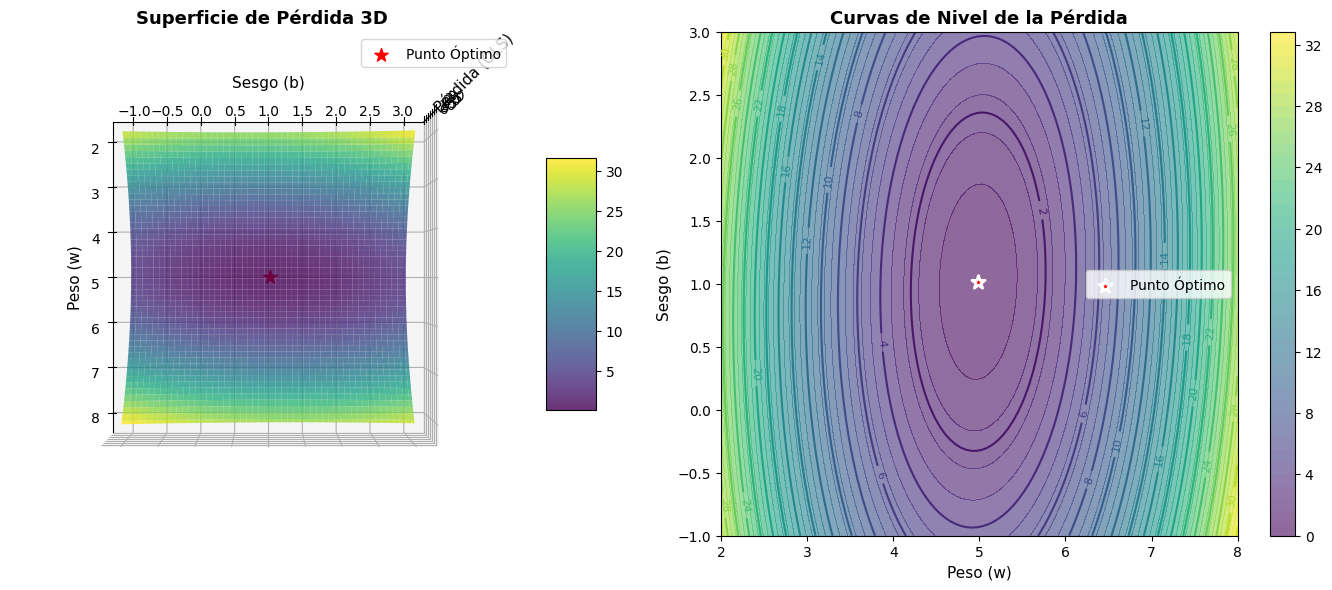

In [ ]:
# Vista desde arriba
fig = plot_loss_surface_contour(
    X_train, y_train,
    w_range=(true_weight-3, true_weight+3),
    b_range=(true_bias-2, true_bias+2),
    resolution=100,
    true_w=w_optimal,
    true_b=b_optimal,
    elev=90, azim=0
)

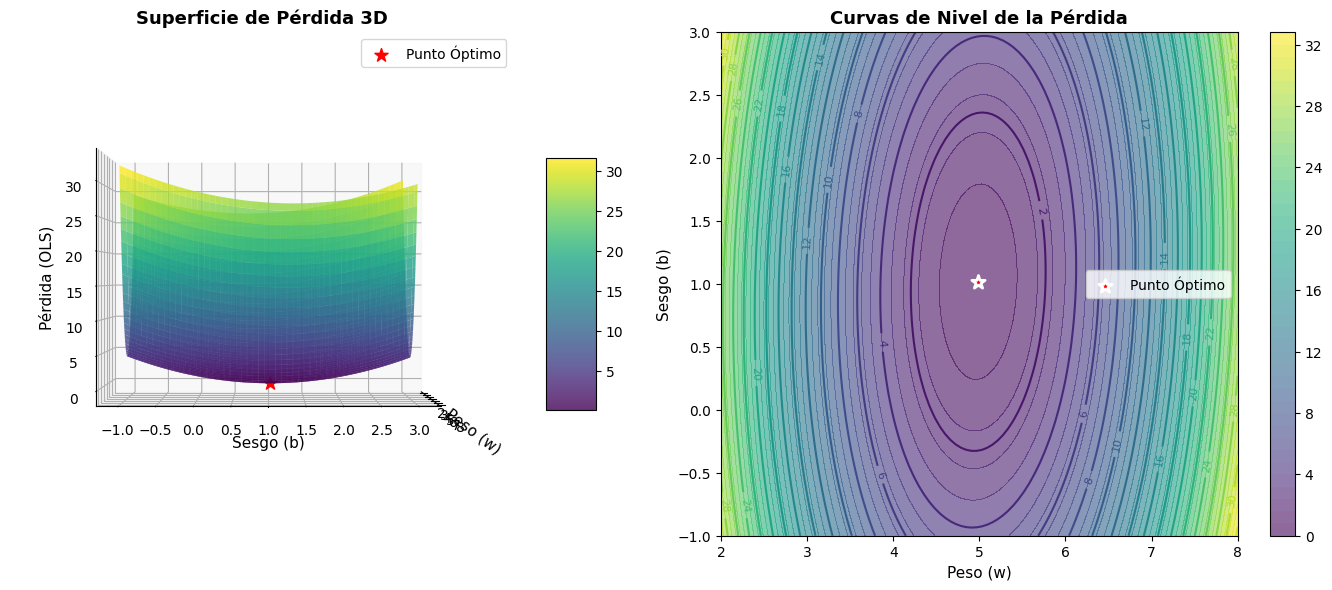

In [ ]:
# Vista lateral
fig = plot_loss_surface_contour(
    X_train, y_train,
    w_range=(true_weight-3, true_weight+3),
    b_range=(true_bias-2, true_bias+2),
    resolution=100,
    true_w=w_optimal,
    true_b=b_optimal,
    elev=0, azim=0
)

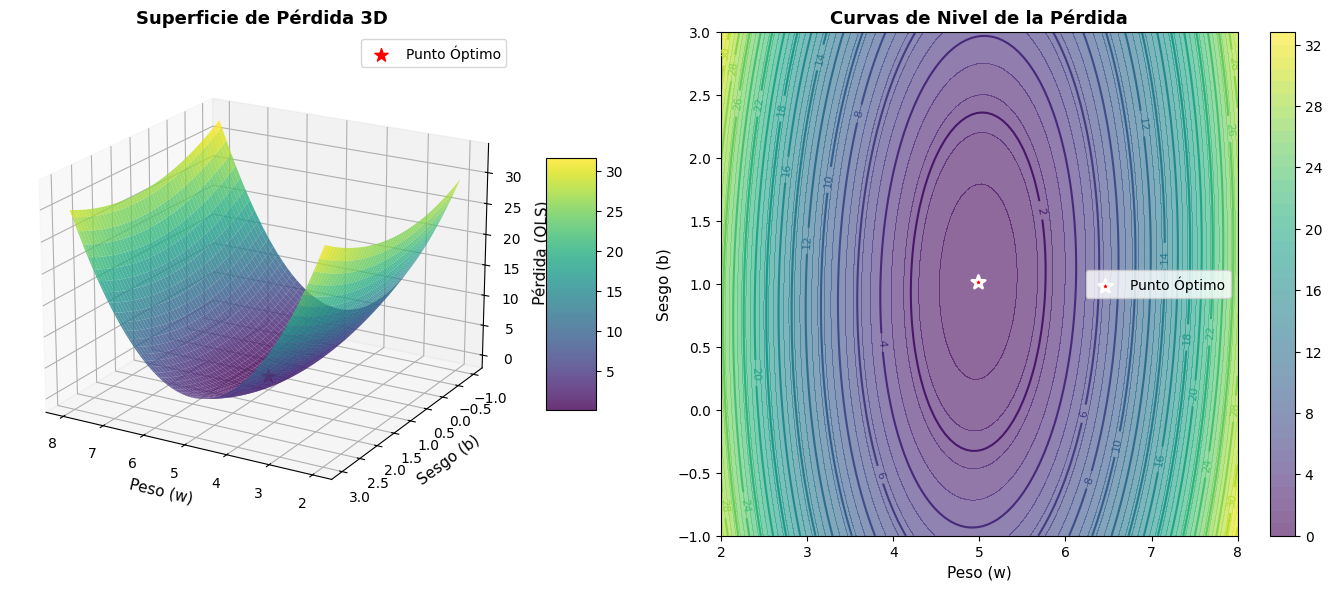

In [ ]:
# Vista inclinada
fig = plot_loss_surface_contour(
    X_train, y_train,
    w_range=(true_weight-3, true_weight+3),
    b_range=(true_bias-2, true_bias+2),
    resolution=100,
    true_w=w_optimal,
    true_b=b_optimal,
    elev=20, azim=120
)

--------

## Cálculo matricial

### Gradiente de un vector

Matemáticamente, el gradiente de una función escalar $f$ se define como:

$$
\nabla f = \begin{pmatrix}
\frac{\partial f}{\partial x_1} \\
\frac{\partial f}{\partial x_2} \\
\vdots \\
\frac{\partial f}{\partial x_n}
\end{pmatrix}
$$

#### Donde:

- $f(x)$ es una función escalar.
- $x_1, x_2, \ldots, x_n$ son las coordenadas del vector.
- $\frac{\partial f}{\partial x_i} $ representa la derivada parcial de $f$  con respecto a la coordenada $x_i$.

Este gradiente proporciona información crucial sobre la dirección y la tasa de cambio de la función escalar \( f \) en el espacio \( n \)-dimensional.

-------

### Propiedades

Asumiendo que $b \in \mathbb{R}^{n}$, $A \in \mathbb{R}^{n \times n}$ y $x \in \mathbb{R}^{n}$

1. $\nabla_{x} b^{T} x=b$
1. $\nabla_{x}^{2} b^{T} x=0$
1. $\nabla_{x} x^{T} A x=2 A x$ (si $A$ es simétrica)
1. $\nabla_{x}^{2} x^{\top} A x=2 A$ (si $A$ es simétrica)

-------



### Ver



1. Cómo se llama la matrix $X^{T}X$, por qué es simétrica y cuándo existe $\left(X^{T}X\right)^{-1}$?
1. Clase que viene vamos hacer nuestro propio modelo usando scipy, numpy
1. Vamos a compararlo con Scikit-learn

## Solución para el caso de 1 variable usando derivadas parciales

Existen muchas maneras de escribir el problema de regresión lineal. Por ejemplo, veamos en [Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression) donde escriben como problema:

Encontrar $\hat{\alpha}$ y $\hat{\beta}$ como $$(\hat{\alpha}, \hat{\beta})=\operatorname{argmin}(Q(\alpha, \beta))$$ si definimos la función objetivo $Q$ como $$
Q(\alpha, \beta)=\sum_{i=1}^n \hat{\varepsilon}_i^2=\sum_{i=1}^n\left(y_i-\alpha-\beta x_i\right)^2
$$ con $\hat{\varepsilon}_i =
y_i-\alpha-\beta x_i
$

Fíjense como tenemos una solución cerrada para $\hat{\alpha}$ y $\hat{\beta}$ dada por:

1. $\widehat{\alpha}=\bar{y}-(\widehat{\beta} \bar{x})$
1. $\widehat{\beta}=\frac{\sum_{i=1}^n\left(x_i-\bar{x}\right)\left(y_i-\bar{y}\right)}{\sum_{i=1}^n\left(x_i-\bar{x}\right)^2}$

Usando **nuestra** notación vectorial. Transforme la notación de wikipedia e intente hallar las soluciónes optimales que nos presentan.

Recuerde:

1. $\widehat{\alpha}$ es la solución de $ \frac{\partial{Q}}{\partial{\alpha}} \sum_{i=1}^n\left(y_i-\alpha-\beta x_i\right)^2 = 0$ y que
1. $\widehat{\beta}$ es la solución de $\frac{\partial{Q}}{\partial{\beta}} \sum_{i=1}^n\left(y_i-\alpha-\beta x_i\right)^2 = 0$


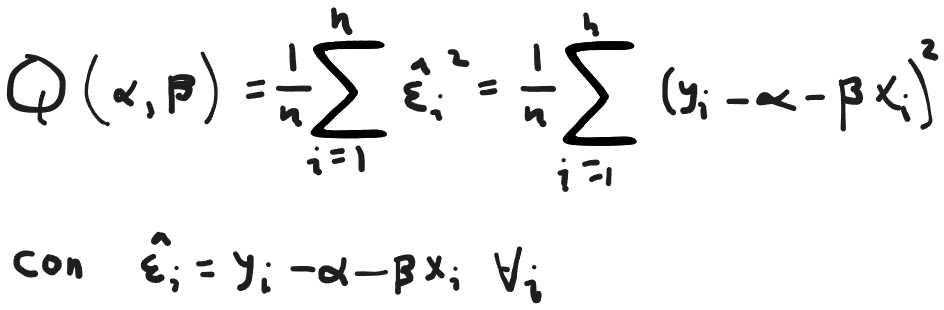

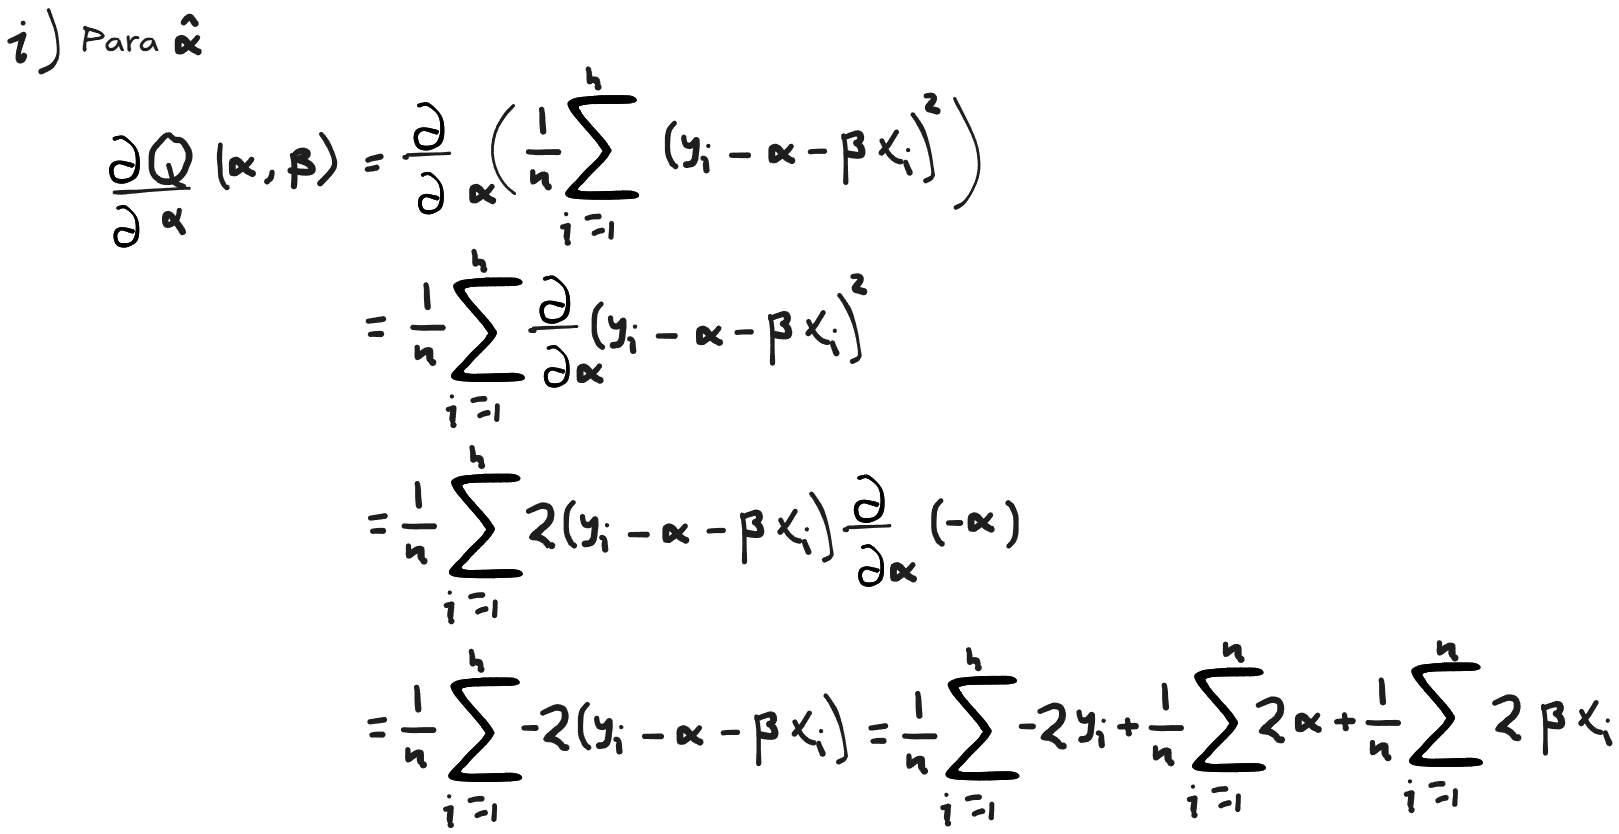

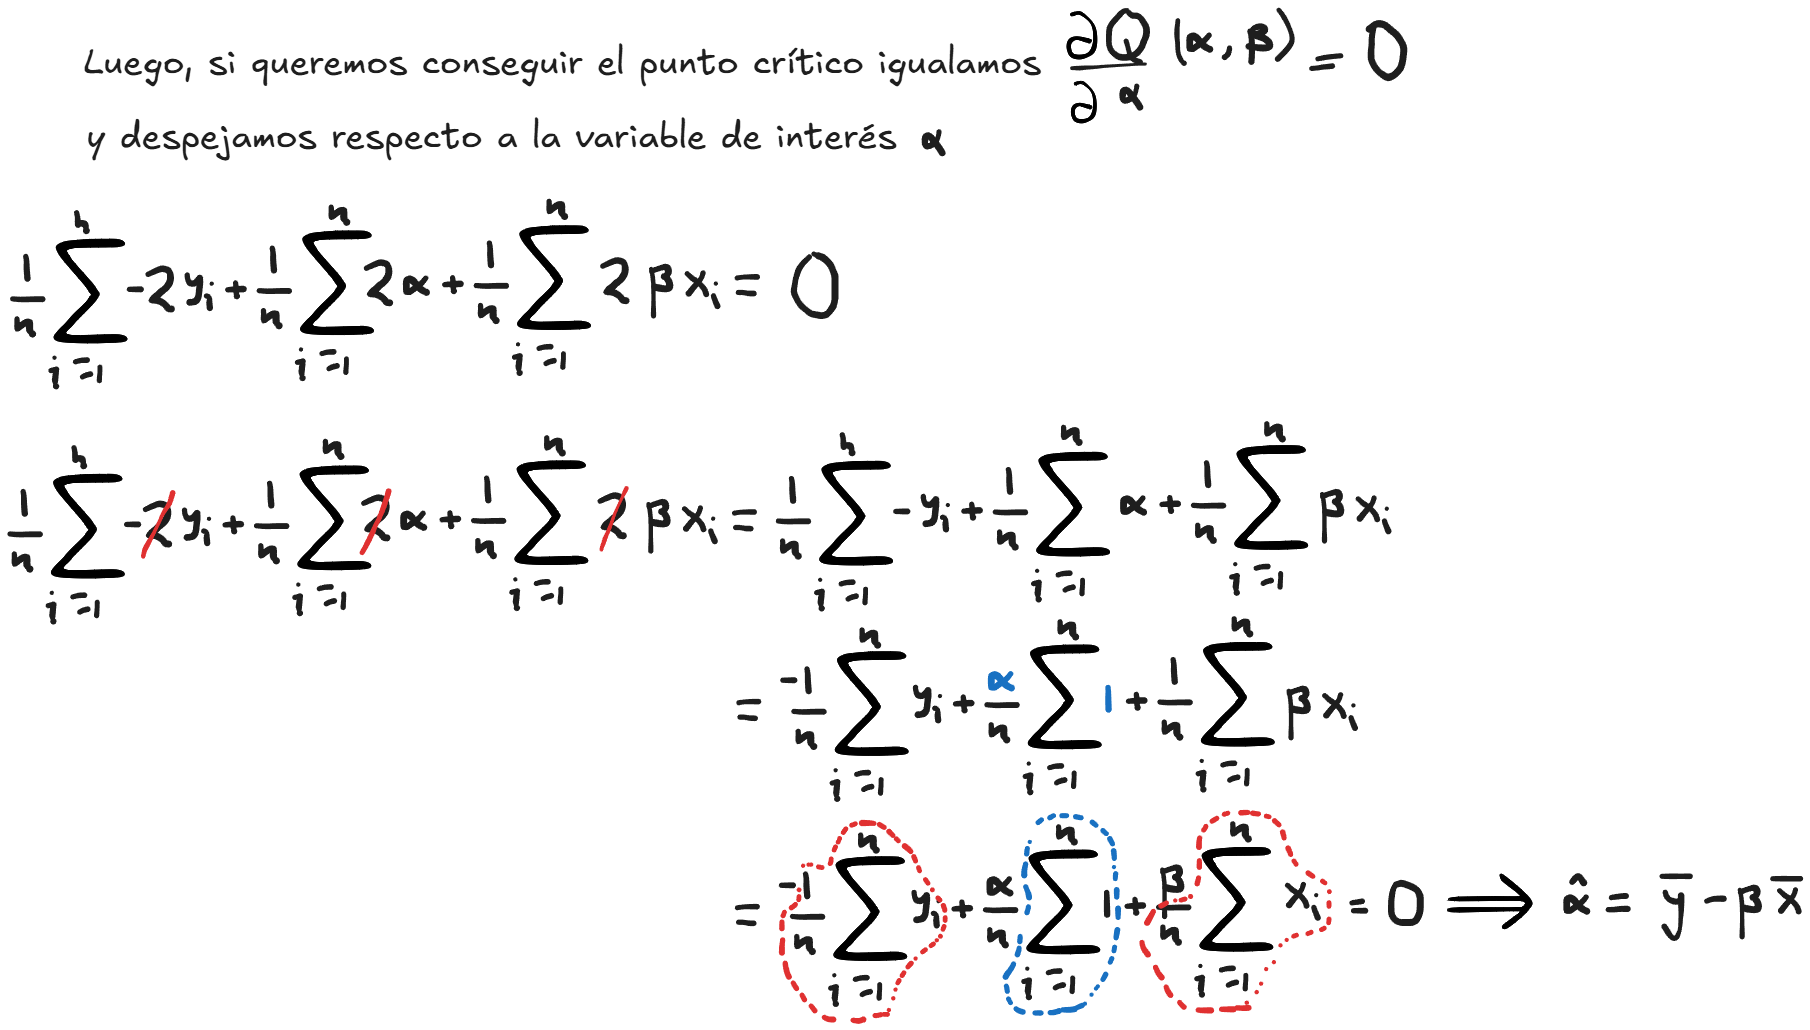

## Cómo seleccionamos el modelo?

De manera similar, podemos preguntar cómo sabemos que un modelo "es bueno"?

Gráfico tomado de [Coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination)

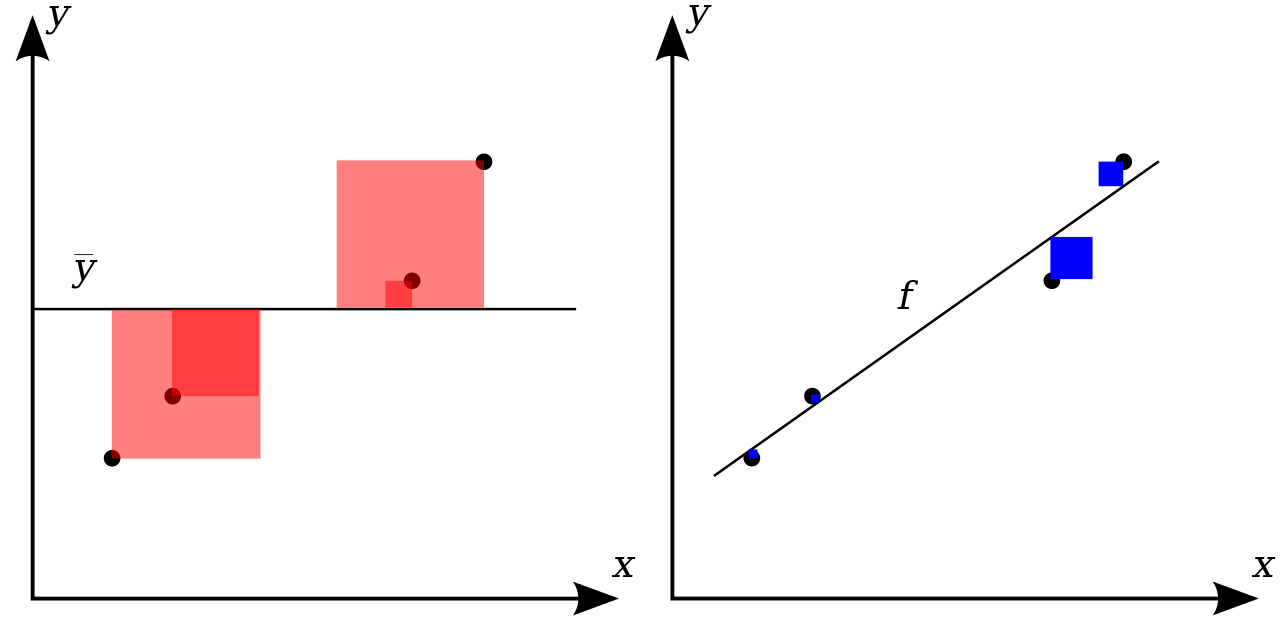

$$R^2=1-\frac{\color{blue}{S S_{\mathrm{res}}}}{\color{red}{S S_{\mathrm{tot}}}}$$

De donde $$\color{blue}{S S_{\mathrm{res}}} = \sum_i\left(y_i-f(x_i)\right)^2=\sum_i e_i^2  $$ y $$\color{red}{S S_{\mathrm{tot}}} = S S_{\mathrm{tot}}=\sum_i\left(y_i-\bar{y}\right)^2 $$

1. Vean como el denominador es **constante** para todos los posibles modelos!
1. Cuáles son los posibles valores de $R^2$



## Método del descenso del gradiente

Supongamos el problema de mínimos cuadrados:

$$OLS\;\;\underset{\beta}{arg \; min}\;\;\frac{1}{2}\|\mathbf{\mathbf{y} - X \beta}\|_2^2\;\; \text{sujeto a}$$

$$\beta \in \mathbb{R}^p,\;\;y \in \mathbb{R}^n,\;\;X \in \mathbb{R}^{n \times p}$$

Dependiendo de las propiedades de $X$ tenemos una solución analítica que denominamos ecuaciones normales.

$$ X^T X \beta = X^T y \Rightarrow \beta^* = (X^T X)^{-1}X^T y $$

En la práctica, usamos métodos iterativos para poder aproximar (o conseguir de manera exacta) la solución $\beta^*$

El método más simple (aún cuando es optimal bajo una suposición sencilla) es el método del descenso del gradiente (_Gradient descent_)


## 1.1 Preliminares

Consideren una función $f$ sin restricciones, suave y convexa
$$
\min _x f(x)
$$

Es decir, $f$ es convexa y diferenciable con $\operatorname{dom}(f)=\mathbb{R}^q$.

Denotamos el valor optimal del problema como: $$f^{\star}=\min _x f(x)$$ y una solución como $x^{\star}$

### El algoritmo del descenso del gradiente

1. Escoja un punto inicial $x^{(0)} \in \mathbb{R}^q$
1. Para cada $k$:
$$
x^{(k)}=x^{(k-1)}-t_k \cdot \nabla f\left(x^{(k-1)}\right), \quad k=1,2,3, \ldots
$$
1. Mientras no haya convergencia o se cumpla un número finito de _pasos_ ($K$)

Con $t_k$ un parámetro dado que denominaremos el _paso_

### Por hacer

1.  Cambiar la notación a lo que necesitamos (El algoritmo lo tenemos que cambiar a la variable de interes que es $\beta$
1. Conseguir el gradiente
1.  Implementar el algoritmo

$$OLS\;\;\underset{\beta}{arg \; min}\;\;\frac{1}{2}\|\mathbf{\mathbf{y} - X \beta}\|_2^2\;\; \text{sujeto a}$$

$$\beta \in \mathbb{R}^p,\;\;y \in \mathbb{R}^n,\;\;X \in \mathbb{R}^{n \times p}$$

Dependiendo de las propiedades de $X$ tenemos una solución analítica que denominamos ecuaciones normales.

$$ X^T X \beta = X^T y \Rightarrow \beta^* = (X^T X)^{-1}X^T y $$

Notación nuestra

$L_\beta(X)= \frac{1}{2}\|\mathbf{\mathbf{y} - X \beta}\|_2^2 = \frac{1}{2} \displaystyle \sum_{i=1}^{n} (y_i - x_i^T\beta  )^2 $

Notación de preliminar

$L(\beta)= \frac{1}{2}\|\mathbf{\mathbf{y} - X \beta}\|_2^2$

Lo que queremos hacer es $$
\min _\beta L(\beta)
$$



1. Escoja un punto inicial $\beta^{(0)} \in \mathbb{R}^q$
1. Para cada $k$:
$$
\beta^{(k)}=\beta^{(k-1)}-t_k \cdot \nabla L\left(\beta^{(k-1)}\right), \quad k=1,2,3, \ldots \text{Podemos asumir  } t_k=t \text{  constante}
$$
1. Mientras no haya convergencia o se cumpla un número finito de _pasos_ ($K$)

$$\nabla L\left(\beta\right) = 2 \left(X^T X \beta - X^T y \right)$$

Solución clase

In [ ]:
import numpy as np
from numpy.linalg import norm

def grad(X, beta, y):
  return 2 * (X.T @ X @ beta - X.T @ y)

def descenso_gradiente(X, y, t_k=1e-5, K=100, eps=1e-6):
  n, m = X.shape
  if n != y.shape[0]:
    raise "Las dimensiones de X y y no son iguales"

  beta = np.zeros(m) # Zeros, ones, random, ...
  beta = beta.reshape(m, 1)
  motivo, error = None, 1e10

  for i in range(K):
    beta_k_1 = beta
    beta = beta - t_k * grad(X, beta, y)

    error = norm(beta - beta_k_1)

    if error <= eps:
      motivo = "Convergencia", i
      break

  if motivo is None:
    motivo = "Pasos", K

  return beta, motivo, error



Solución "adecuada"

In [ ]:
import numpy as np
from numpy.linalg import norm

def grad(X, beta, y):
  return 2 * (X.T @ X @ beta - X.T @ y)

def grad_efi(X, beta, y, Gram,  Xty):
  return 2 * (Gram @ beta - Xty)

def descenso_gradiente_efi(X, y, t_k=1e-5, K=100, eps=1e-6):
  n, m = X.shape
  if n != y.shape[0]:
    raise "Las dimensiones de X y y no son iguales"

  beta = np.zeros(m) # Zeros, ones, random, ...
  beta = beta.reshape(m, 1)
  motivo, error = None, 1e10

  Gram = X.T @ X
  Xty = X.T @ y

  for i in range(K):
    beta_k_1 = beta
    beta = beta - t_k * grad_efi(X, beta, y, Gram, Xty)

    error = norm(beta - beta_k_1)

    if error <= eps:
      motivo = "Convergencia", i
      break

  if motivo is None:
    motivo = "Pasos", K

  return beta, motivo, error



In [ ]:
x = np.random.randn(100)

X = x.reshape(100, 1)

X = np.stack([X, np.ones(100).reshape(100, 1)], axis=1)

beta = np.array([2, 3])

y = beta @ X


In [ ]:
y.shape

(100, 1)

In [ ]:
X.shape

(100, 2, 1)

In [ ]:
y

array([[ 2.8098084 ],
       [ 2.46861362],
       [ 1.55615718],
       [ 3.54848641],
       [ 4.0633352 ],
       [ 6.40231612],
       [ 4.33870636],
       [ 5.93110247],
       [ 1.96773501],
       [ 5.53435645],
       [ 1.67986244],
       [ 5.05795669],
       [ 1.13159568],
       [ 2.45537337],
       [ 5.77306889],
       [ 1.97730512],
       [ 1.23950858],
       [ 3.94072008],
       [ 7.37926247],
       [ 3.58306643],
       [ 4.60643132],
       [ 6.76690206],
       [ 2.19123998],
       [ 3.55861827],
       [ 2.16199761],
       [ 0.37052685],
       [ 3.5294035 ],
       [ 5.83356865],
       [ 2.49060965],
       [ 4.35955702],
       [ 2.78755029],
       [ 3.30575702],
       [ 1.13430503],
       [ 4.70105054],
       [ 2.48646124],
       [ 2.49918765],
       [ 1.3522758 ],
       [ 0.65097385],
       [ 3.2804541 ],
       [ 0.93255398],
       [ 3.5429396 ],
       [ 0.65927186],
       [ 4.60931181],
       [ 1.03675403],
       [ 0.93714076],
       [ 3

In [ ]:
beta, motivo, error = descenso_gradiente(X.reshape(100, 2), y, t_k=2, K=100000, eps=1e-8)

<ipython-input-74-785203187ff1>:5: RuntimeWarning: overflow encountered in multiply
  return 2 * (X.T @ X @ beta - X.T @ y)
<ipython-input-67-f9e2522ebb45>:18: RuntimeWarning: invalid value encountered in subtract
  beta = beta - t_k * grad(X, beta, y)


In [ ]:
beta

array([[nan],
       [nan]])

In [ ]:
beta, motivo, error = descenso_gradiente_efi(X.reshape(100, 2), y, t_k=1e-3, K=100000, eps=1e-8)

In [ ]:

beta

array([[1.99999994],
       [3.00000002]])

In [ ]:
motivo

('Convergencia', 106)

In [ ]:
error

0.00592349230432266

In [ ]:
X = X.reshape(100, 2)

In [ ]:
grad(X, np.zeros(2).reshape(2, 1), y)

array([[-387.69655496],
       [-596.41360136]])

In [ ]:
np.ones(2)

array([1., 1.])